Top 10 Most Frequent Job Titles:
Title
Full Stack Developer                42
Graphic Designer                    40
Senior Software Engineer            38
Software Engineer                   37
Product Manager                     34
DevOps Engineer                     31
UI/UX Designer                      31
Sales Development Representative    30
Business Development Executive      28
Frontend Developer                  26
Name: count, dtype: int64


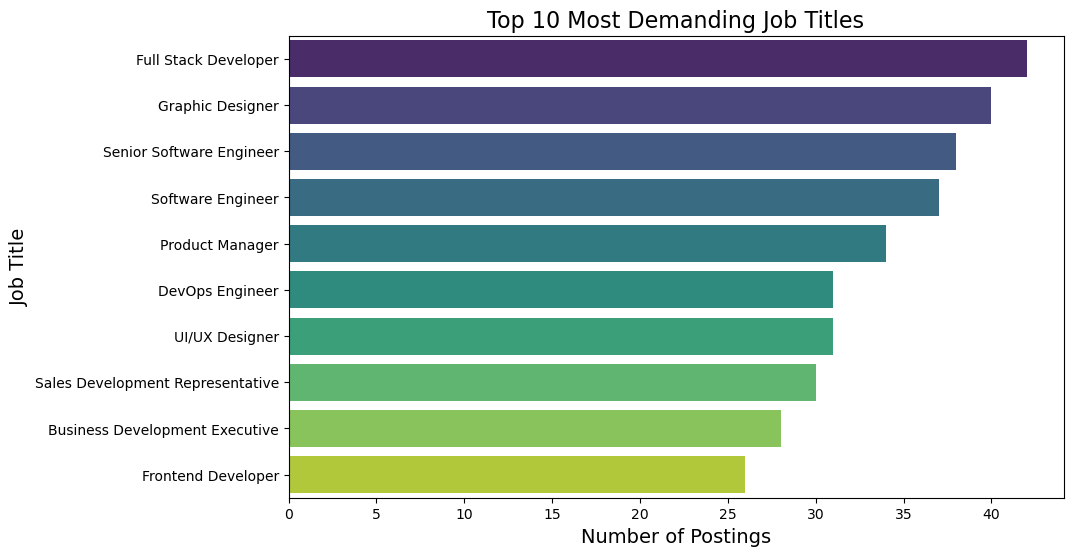


Top Job Categories:
Category
Engineering          3335
Sales                1318
Other                1170
Marketing             811
Operations            737
Designer              507
Product               263
Other Engineering      83
Management             80
Founder                 4
Investor                3
Name: count, dtype: int64


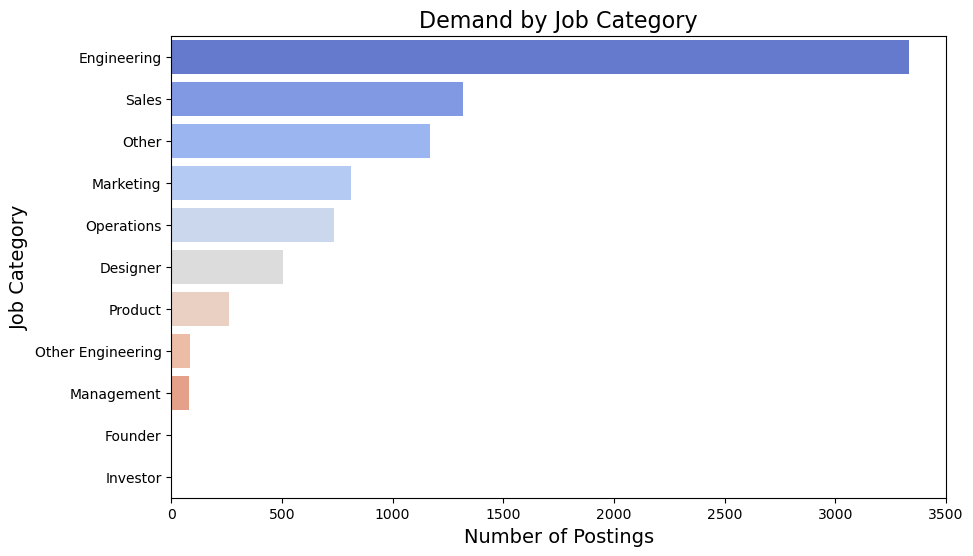

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file (after conversion)
df = pd.read_csv('StartupJobsIndia.csv')

# Analyze the most frequent job titles
title_counts = df['Title'].value_counts()

# Display the top 10 most frequent job titles
print("Top 10 Most Frequent Job Titles:")
print(title_counts.head(10))

# Plot the top 10 most frequent job titles
plt.figure(figsize=(10, 6))
sns.barplot(x=title_counts.head(10).values, y=title_counts.head(10).index, palette="viridis")
plt.title("Top 10 Most Demanding Job Titles", fontsize=16)
plt.xlabel("Number of Postings", fontsize=14)
plt.ylabel("Job Title", fontsize=14)
plt.show()

# Analyze the most frequent job categories
category_counts = df['Category'].value_counts()

# Display the most frequent job categories
print("\nTop Job Categories:")
print(category_counts)

# Plot the job categories
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.values, y=category_counts.index, palette="coolwarm")
plt.title("Demand by Job Category", fontsize=16)
plt.xlabel("Number of Postings", fontsize=14)
plt.ylabel("Job Category", fontsize=14)
plt.show()


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df = pd.read_csv('StartupJobsIndia.csv')

# Clean the 'Posted' column for time-based analysis
df['Posted Cleaned'] = df['Posted'].str.extract('(\d+)', expand=False).fillna(0).astype(int)
df['Posted Unit'] = df['Posted'].str.extract('([a-zA-Z]+)', expand=False).fillna('days')

# Normalize time to days
time_multipliers = {'days': 1, 'weeks': 7, 'months': 30}
df['Posted Days Ago'] = df['Posted Cleaned'] * df['Posted Unit'].map(time_multipliers)
df['Posted Days Ago'] = df['Posted Days Ago'].replace(0, 0.5)  # Handle "Posted Today"

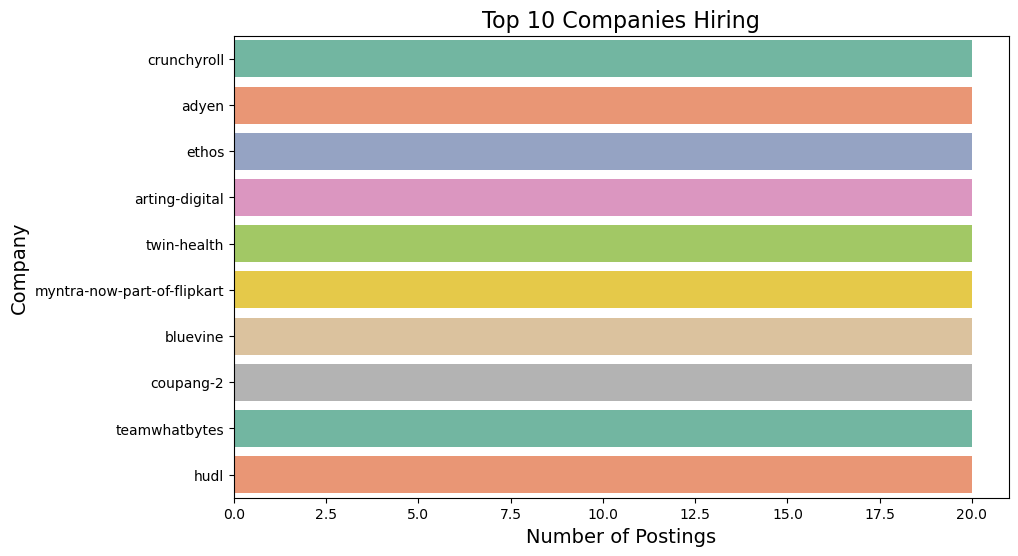

In [9]:
# 1. Top Hiring Companies
company_counts = df['Company Name'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=company_counts.head(10).values, y=company_counts.head(10).index, palette="Set2")
plt.title("Top 10 Companies Hiring", fontsize=16)
plt.xlabel("Number of Postings", fontsize=14)
plt.ylabel("Company", fontsize=14)
plt.show()

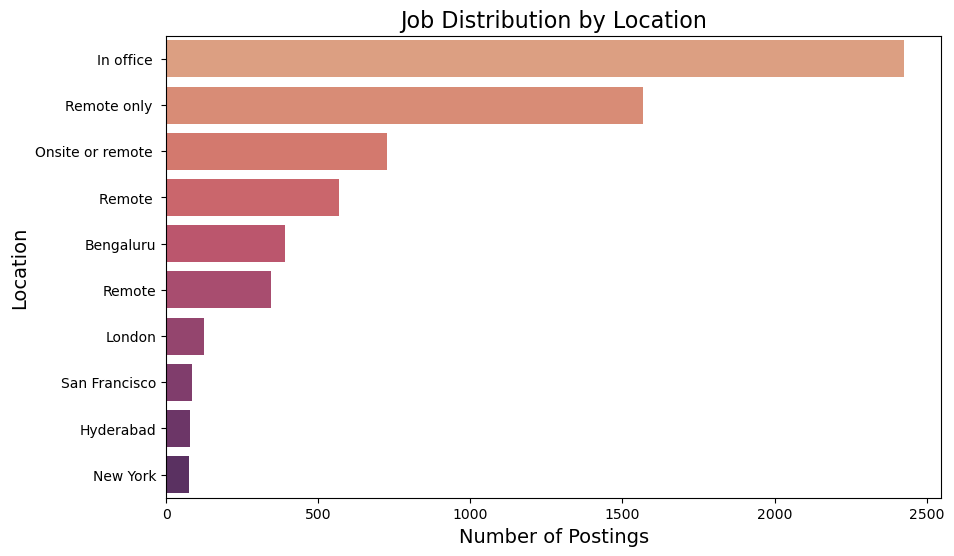

In [11]:
# 2. Geographical Job Distribution
df['Primary Location'] = df['Location'].str.split('•').str[0]  # Extract primary location
location_counts = df['Primary Location'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=location_counts.head(10).values, y=location_counts.head(10).index, palette="flare")
plt.title("Job Distribution by Location", fontsize=16)
plt.xlabel("Number of Postings", fontsize=14)
plt.ylabel("Location", fontsize=14)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


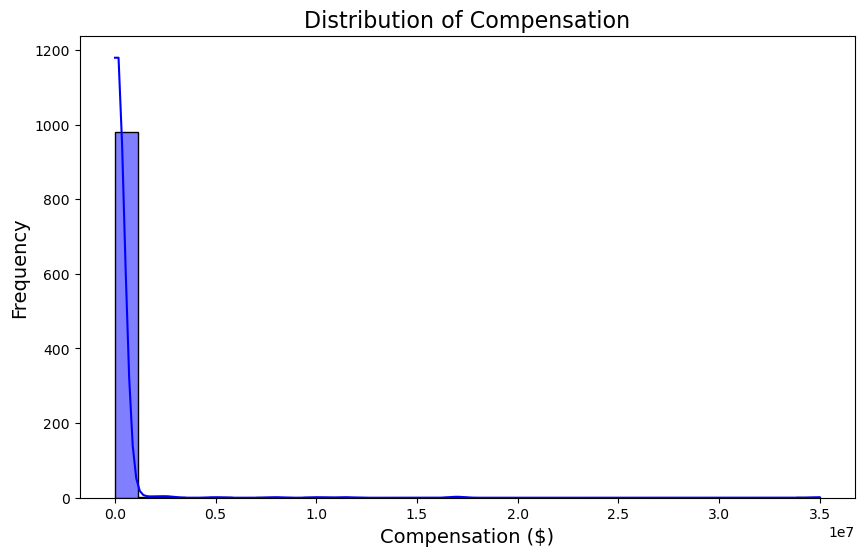

In [13]:
# 3. Compensation Analysis (Filter rows with valid compensation data)
df['Compensation'] = df['Compensation•Equity'].str.extract('([\d,]+k)', expand=False)
df['Compensation'] = df['Compensation'].str.replace('k', '').str.replace(',', '').astype(float) * 1000
plt.figure(figsize=(10, 6))
sns.histplot(df['Compensation'], kde=True, color="blue", bins=30)
plt.title("Distribution of Compensation", fontsize=16)
plt.xlabel("Compensation ($)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


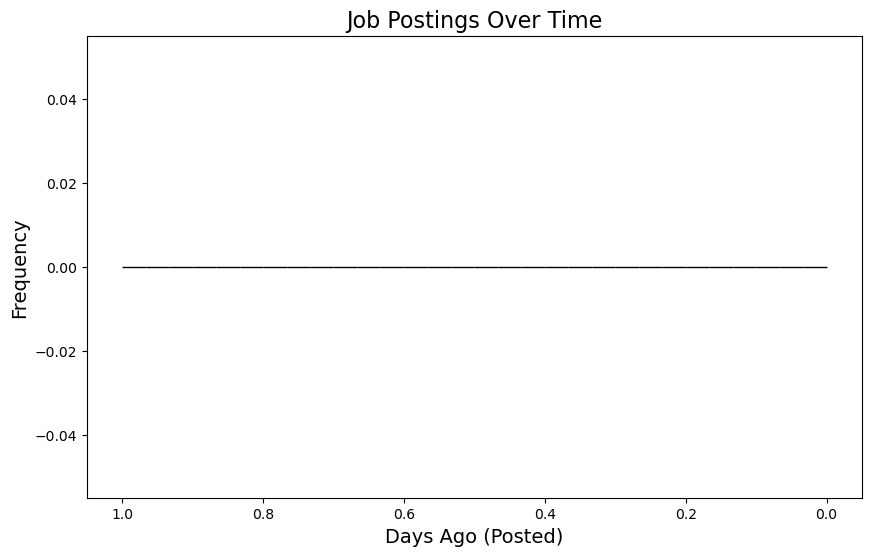

In [15]:
# 4. Job Demand Over Time
plt.figure(figsize=(10, 6))
sns.histplot(df['Posted Days Ago'], bins=30, kde=True, color="green")
plt.title("Job Postings Over Time", fontsize=16)
plt.xlabel("Days Ago (Posted)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.gca().invert_xaxis()  # Most recent jobs on the left
plt.show()

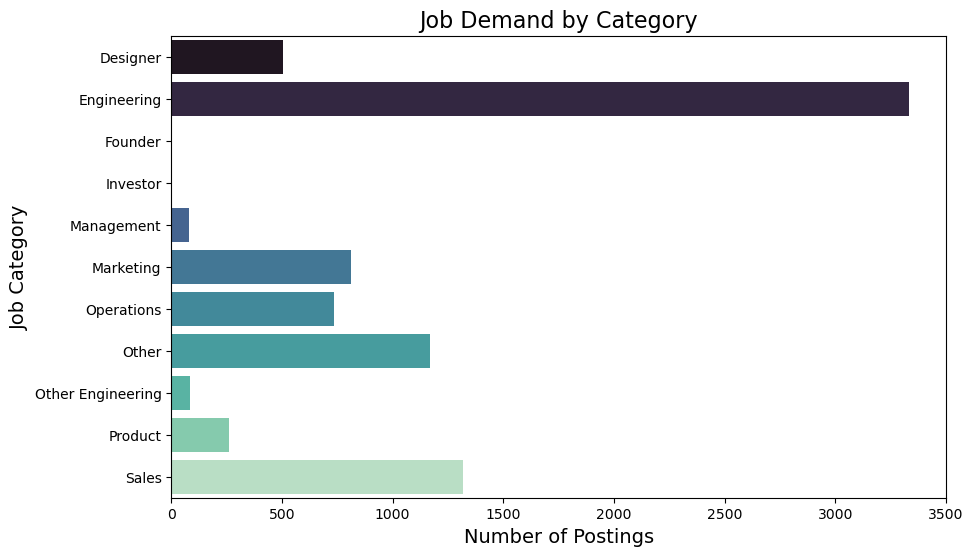

In [17]:
# 5. Category-Specific Insights
category_title_counts = df.groupby('Category')['Title'].value_counts().unstack().fillna(0).sum(axis=1)
plt.figure(figsize=(10, 6))
sns.barplot(x=category_title_counts.values, y=category_title_counts.index, palette="mako")
plt.title("Job Demand by Category", fontsize=16)
plt.xlabel("Number of Postings", fontsize=14)
plt.ylabel("Job Category", fontsize=14)
plt.show()